# zxs: A Package to Save on Time on Data Science Projects

## Introduction-

As a data scientist, I use the `scikit-learn` package frequently. Along the way, I got tired of repeatedly typing several different code blocks across various projects. I have compiled some functions that streamline the process of creating these code snippets. 

In addition, I have also added a command-line interface that makes it easy to convert any dataset into a numeric format for ingestion by machine learning algorithms.

## Instructions-

### Installation:

The `zxs` package can be installed conveniently using `pip`. This method also works for Anaconda users (like myself) and requires no additional setup. Here are the steps to getting started:

1) Install [pip](https://pip.pypa.io/en/stable/installing/).

2) Open up a command-line terminal.

3) Type: `pip install data_science`.

### Contents:

The package has 6 functions: `dat_imp`, `local_import`, `separate`, `machine_learning`, `visualize`, & `transform`(accessible via CLI). 

The `dat_imp` function requires 7 inputs-
* **wd**: A string containing the path to set the working directory
* **url**: A string containing the url for the online location of the data
* **fn**: A string with the name of the file(zip) to be downloaded
* **path**: A string with the local destination for the files, ie-`staging/file_name`
* **header**: The index location of the column names
* **sep**: The separator used to indicate the distinction between data fields
* **target**: A string of the specific file_name to be imported into python

The output will be a single dataset containing the "target" file in the form of a Pandas data frame.

*The function will create a dictionary containing a separate dataframe for each file in the `.zip`. The keys for each df will be the actual file names minus extensions. Only the "target" will actually be imported into the workspace. The remaining files will exist locally in `wd_path/staging/`.* 

The `local_import` function requires 2 inputs-
* **wd**: A string containing the path to set the working directory
* **fn**: A string containing the name of the csv to be imported, with extension

The output will be a Pandas data frame containing the target `.csv`.

The `separate` function requires 2 inputs-
* **data**: A pandas data frame
* **target**: A string containing the target variable
* **size**: The size of the test data, this will be split equally into validation and testing sets

The output will be 6 new datasets-
* x_train
* x_val
* x_test
* y_train
* y_val
* y_test

The `machine_learning` function requires 6 inputs-
* **package**: A string containing the usual import statement for the model you want to use
* **x**: A dataset containing the feature variables
* **y**: A dataset containing the target variable
* **x1**: A dataset containing the feature variables of the validation/test set
* **y1**: A dataset containing the target variable of the validation/testing set
* **model**: The statement required to initalize your desired model

The output will be 4 variables-
* **preds**: A list of the actual predictions for the validation/testing set
* **conf_mat**: A confusion matrix of the results for the validation/testing set
* **class_rep**: A classification report containing summary statistics for the results
* **acc**: The final model accuracy

The `visualize` function requires 2 inputs-
* **target**: The target variable. This is the same input as `y1` in the `machine_learning` function
* **preds**: This is one of the outputs of the `machine_learning` function- the actual predictions created by the model for the validation/testing set

The output will be a plot showing the ROC curve for the model. 

*Note- Since the output is an ROC curve, the target variable must inherently be binary*

Last, but not least, there is the `transform` function. This can also be accessed via the command-line by simply calling `zxs` and entering the inputs, which are:
* **data**: The pandas dataframe that you wish to use. 
* **kwargs**: A dictionary that contains three lists, which are all optional parameters. The key values are: `'date'`, `'drop_cols'`, & `'num_cols'`. This function will use pandas to convert the date using pd.to_datetime. Then, the list of drop_columns will be dropped. Finally, the numeric columns will be converted to numbers while the remaining columns will be converted to Pandas type "category". The categorical columns will then be converted to numeric representation. 

## Example-  

As an example, we will go through the implementation of an algorithm to classify whether or not users will subscribe to a 'term deposit'. The data is contained on the UCI Machine Learning Repository and more information regarding it can be found on that website.  

In any case, lets get started.

### Set-up:

In [11]:
# Load additional libraries
import random
import zxs

### Loading the Data:

**Option 1)** Using `dat_imp`

In [3]:
# Define the variables
wd = '/path/to/files/'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'
fn = 'bank-additional.zip'
path = 'staging/bank-additional'
header = 0
sep = ';'
target = 'bank-additional-full'

# Load the data
data = zxs.dat_imp(wd, url, fn, path, header, sep, target)

This code is equivalent to:

In [ ]:
data = zxs.dat_imp('/path/to/files', 'url', 'bank-additional.zip', 'staging/bank-additional', 0, ';', 'bank-additional-full')

**Option 2)** Using `local_import`

In [ ]:
# Load the data
data = local_import('/path/to/files', 'file_name)

# OR
path = 'path/to/files'
name = 'file_name.csv'

data = local_import(path, name)

### Pre-Processing (via `transform()`)

In the transform function, the `**kwargs` parameter is optional. Meaning that all three values do not need to be supplied. In the case of the bank data, there is no "date" column and also there are no columns that need to be dropped. We can simply create a dictionary containing the columns that are numeric, and the remainder will be converted to categorical.

In [13]:
# Define the numeric columns and the ones to be dropped
kwargs = {'num_cols': ['age', 'duration', 'campaign', 'pdays', 'previous' 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']}

zxs.transform(data, **kwargs)

NameError: name 'transform' is not defined

*Now that we have done some basic preprocessing of the data, we are ready to employ the `machine_learning` package.*

### Useage:

First, we will create our training, validation, and testing sets.

In [37]:
# Call split function
x_train, x_val, x_test, y_train, y_val, y_test = ml.separate(data, 'Won?', .3)

In [38]:
# Fill blank cells with 0's
x_train.fillna(0, inplace = True)
x_val.fillna(0, inplace = True)
x_test.fillna(0, inplace = True)

In [39]:
# Call ml function
preds, conf_mat, class_rep, acc = ml.machine_learning('from sklearn.tree import DecisionTreeClassifier', x_train, y_train, x_val, y_val, 'DecisionTreeClassifier()')

We have now successfully created a decision tree and collected all of the relevant outputs and information. The next step is to visualize the results. For this purpose, we will use an ROC curve. Before we can do this, however, we will need to modify the data to a format that can be handled by the `roc_curve` function from `sklearn.metrics`.

In [40]:
# Fix the output
codes = {'0': 0, '1': 1}
y_val = y_val.map(codes).astype('category', ordered = False, categories = [0, 1]).astype(int)
preds = pd.Series(preds)
preds = preds.map(codes).astype('category', ordered = False, categories = [0, 1]).astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


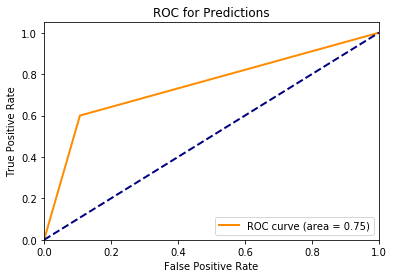

In [41]:
# Call visualization function
out = ml.visualize(y_val, preds)

## Conclusion-

Thats all there is to it. 

What I have tried to do here is provide a simpler interface for interacting with multiple models using the `sklearn` library in python. 

The goal is to quickly and efficiently be able to run several different models without having to store excess variables or reptitively type multiple snippets of code.

Enjoy! 